# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-wvjYdDl50TvV9cRY4PdSPG&si=Fft31dpXqRsb4tw2 >}}

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.linear_model
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
np.random.seed(43052)
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)

In [3]:
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,1.784955,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,10.789671,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,8.221213,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,2.137594,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,8.650144,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.057243,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630,281.671647,296.307373,...,269.541846,278.220546,278.484758,284.901284,272.451612,265.784490,275.795948,280.465992,268.528889,283.638470
496,4.108020,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810,309.695838,301.979914,...,304.680578,295.476836,316.582100,319.412132,312.984039,312.372112,312.106944,314.101927,309.409533,297.429968
497,2.430590,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560,238.710310,233.797065,...,233.469238,235.160919,228.517306,228.349646,224.153606,230.860484,218.683195,232.949484,236.951938,227.997629
498,5.343171,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050,324.448247,314.271045,...,326.297700,309.893822,312.873223,322.356584,319.332809,319.405283,324.021917,312.363694,318.493866,310.973930


# 4. True (Oracle)

In [4]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression()
## step3
predictr.fit(X,y)
## step4 : pass 

LinearRegression()

In [5]:
print(f'train_score:\t{predictr.score(X,y):.4f}')
print(f'test_score:\t{predictr.score(XX,yy):.4f}')

train_score:	0.9133
test_score:	0.9127


# 5. Baseline

`-` 모든 변수를 활용하여 회귀모형으로 적합 $\to$ 최악의 결과 

In [6]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression()
## step3
predictr.fit(X,y)
## step4 : pass 


LinearRegression()

`-` 평가

In [7]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:	 1.0000
test_score:	 0.1171


# 6. Lasso

`-` Lasso를 이용 

In [8]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Lasso(alpha=1)
## step3
predictr.fit(X,y)
## step4 : pass 

Lasso(alpha=1)

`-` 평가

In [9]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:	 0.8600
test_score:	 0.8306


# 7. Lasso는 왜 결과를 좋게 만들까? 

## A. 정확한 설명 

`-` 어려워요..


## B.  직관적 설명 (엄밀하지 않은 설명)

`-` 느낌: 몇 개의 toeic coef들로 쉽게 0.01을 만들게 해서는 안된다. 

- 아이디어1: 0.01을 **동일한 값으로 균등하게 배분한다**. -- Ridge, L2-penalty 
- 아이디어2: 아주 적은숫자의 coef만을 살려두고 나머지 coef값은 0으로 강제한다. -- Lasso, L1-penalty

`-` 계수값이 0이라는 의미: 그 변수를 제거한것과 같은 효과 

`-` 아이디어2의 기원: `y ~ toeic + gpa` 가 트루이지만, `y ~ toeic0 + gpa` 으로 적합해도 괜찮잖아? 

`-` 진짜 학습된 계수값이 대부분 0인지 확인해보자.

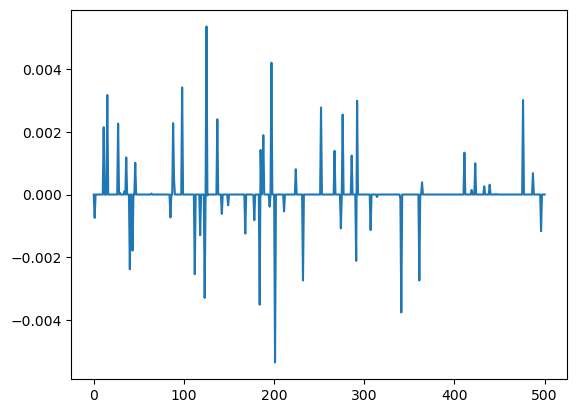

In [10]:
plt.plot(predictr.coef_[1:])

## C. $\alpha$ 에 따른 변화 관찰 

`-` 여러개의 predictor 학습 

In [ ]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
alphas = np.linspace(0,2,100)
predictrs = [sklearn.linear_model.Lasso(alpha=alpha) for alpha in alphas]
## step3
for predictr in predictrs: 
    predictr.fit(X,y)
## step4 : pass 

In [ ]:
plt.plot(predictrs[0].coef_[1:],label=r'$\alpha={}$'.format(predictrs[0].alpha))
plt.plot(predictrs[50].coef_[1:],label=r'$\alpha={}$'.format(predictrs[50].alpha))
plt.plot(predictrs[-1].coef_[1:],label=r'$\alpha={}$'.format(predictrs[-1].alpha))
plt.legend()

`-` predictor 들의 toeic 계수합은 여전히 0.01 근처

In [ ]:
print(f'alpha={predictrs[0].alpha:.4f}\tsum(toeic_coef)={predictrs[0].coef_[1:].sum()}')
print(f'alpha={predictrs[50].alpha:.4f}\tsum(toeic_coef)={predictrs[50].coef_[1:].sum()}')
print(f'alpha={predictrs[-1].alpha:.4f}\tsum(toeic_coef)={predictrs[-1].coef_[1:].sum()}')

`-` number of non-zero coefs 를 시각화 

In [ ]:
non_zero_coefs = [(abs(predictr.coef_[1:])>0).sum() for predictr in predictrs]

In [ ]:
plt.plot(alphas,non_zero_coefs)

## D. coef를 0으로 만드는 수학적 장치 

`-` Ridge(복습): coef의 값들을 엔빵하는 수학적 장치

- 패널티: 유사토익들의 계수값을 제곱한뒤 합치고(=L2-norm을 구하고), 그 값이 0에서 떨어져 있을 수록 패널티를 줄꺼야! 

`-` Lasso: coef의 값들을 대부분 0으로 만드는 수학적 장치

- 패널티: 유사토익들의 계수값의 절대값을 구한뒤에 합치고(=L1-norm을 구하고), 그 값이 0에서 떨어져 있을 수록 패널티를 줄꺼야! 

`-` 사실 L1, L2 패널티에 따라서 이러한 결과가 나오는 것은 이해하기 어렵다. (그래서 취업/대학원 진학시 단골질문중 하나)